In [1]:
import sys, os

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

from model_fitting import initialize_fitting 
from analyze_fits import analyze_gabor_params
from utils import default_paths
# from analyze_features import load_feature_stats
# 
import matplotlib.pyplot as plt
from matplotlib import cm

from plotting import load_fits, plot_utils

/home/mmhender/imstat_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load everything

In [2]:
models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)

which_prf_grid=5;
feature_type='gabor_solo'
subject=998

path_to_load = default_paths.gabor_texture_feat_path
path_to_load = os.path.join(path_to_load, 'feature_stats')

In [3]:
fn1 = os.path.join(path_to_load, 'S%d_%s_categ_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_categ_discrim_tstat_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_categ_nsamp_grid%d.npy'%(subject, feature_type, which_prf_grid))

corr = np.load(fn1,allow_pickle=True)
discrim = np.load(fn2,allow_pickle=True)
nsamp = np.load(fn3,allow_pickle=True)

fn1 = os.path.join(path_to_load, 'S%d_%s_categ_partial_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_categ_nsamp_partial_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))

partial_corr = np.load(fn1,allow_pickle=True)
partial_nsamp = np.load(fn2,allow_pickle=True)

In [4]:
fn2load = os.path.join(default_paths.stim_labels_root, 'Highlevel_counts_all.npy')
counts = np.load(fn2load, allow_pickle=True).item()
axis_names = counts['categ_names']
axes_use = [0,1,2,3, 4,5,6,7]
axis_names = np.array(axis_names)[axes_use]
signed_names = axis_names
axis_names, signed_names

(array(['face', 'building', 'animate', 'inanimate', 'small', 'large',
        'indoor', 'outdoor'], dtype='<U9'),
 array(['face', 'building', 'animate', 'inanimate', 'small', 'large',
        'indoor', 'outdoor'], dtype='<U9'))

In [5]:
# Gather information about the gabor feature channels
sf_unique, ori_unique = analyze_gabor_params.get_gabor_feature_info(n_ori=12, n_sf=8)
n_sf = len(sf_unique)
n_ori = len(ori_unique)
partial_corr_reshaped = np.reshape(partial_corr, [n_ori, n_sf, n_prfs, len(signed_names)], order='F')
corr_reshaped = np.reshape(corr, [n_ori, n_sf, n_prfs, len(signed_names)], order='F')

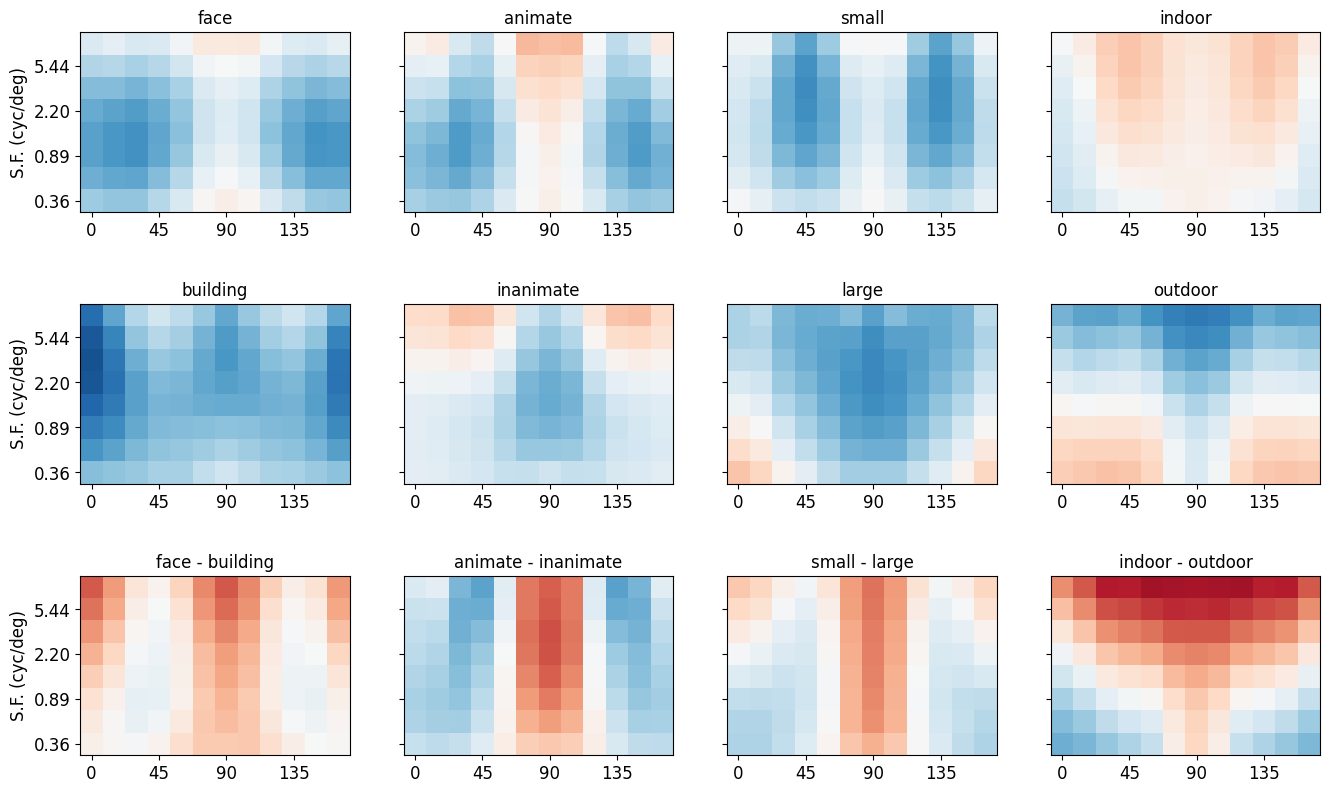

In [6]:
plot_utils.set_all_font_sizes(12)
plt.rcParams['pdf.fonttype']=42

plot_inds = np.array([0,4,8,1,5,9,2,6,10,3,7,11])+1

clims = [-0.2, 0.2]
partial_corr_avgsubs = np.mean(partial_corr_reshaped, axis=2)

plt.figure(figsize=(16,10));
    
pairs = [[0,1],[2,3],[4,5],[6,7]]

pi = 0;
for pair_ind, pair in enumerate(pairs):
    
    
    images = [partial_corr_avgsubs[:,:,pair[0]], \
              partial_corr_avgsubs[:,:,pair[1]], \
              partial_corr_avgsubs[:,:,pair[0]] - partial_corr_avgsubs[:,:,pair[1]]]
    names = [axis_names[pair[0]], \
             axis_names[pair[1]], \
             '%s - %s'%(axis_names[pair[0]], axis_names[pair[1]])]
    
    for im, name in zip(images, names):
       
        pi+=1
        plt.subplot(3, 4, plot_inds[pi-1])

        plt.pcolormesh(im.T, vmin=clims[0], vmax=clims[1], cmap=cm.RdBu)
    
        plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
        # plt.xlabel('orientation (deg)')
        # else:
            # plt.xticks(np.arange(0,12,3)+0.5,[])
        sf_ticks = sf_unique[[0,2,4,6]].round(2)
        if np.mod(plot_inds[pi-1], 4)==1:
            plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
            plt.ylabel('S.F. (cyc/deg)')
        else:
            plt.yticks(np.array([0,2,4,6])+0.5, [])
   
        plt.axis('square')
        plt.xlim([0,12])
        plt.ylim([0,8])

        plt.title(name)
    
fn2save = fn2save = os.path.join(default_paths.fig_path,'category_imagestats.pdf')
plt.savefig(fn2save)

In [9]:

fn1 = os.path.join(path_to_load, 'S%d_%s_mean_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_var_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_covar_grid%d.npy'%(subject, feature_type, which_prf_grid))

mean = np.load(fn1,allow_pickle=True)
var = np.load(fn2,allow_pickle=True)
covar = np.load(fn3,allow_pickle=True)

mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')
var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')


#### Plot mean/variance each feature channel
Averaged across pRFs

0.03906453 0.13671562
0.00013747296 0.0012682885


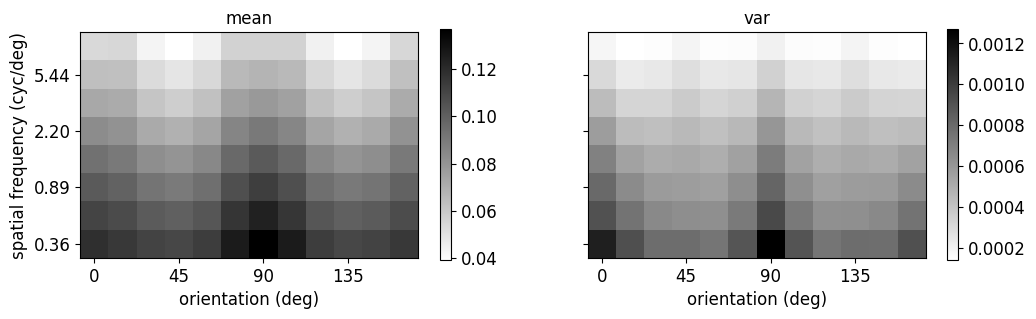

In [10]:
plot_utils.set_all_font_sizes(12)
plt.rcParams['pdf.fonttype']=42

plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image = np.mean(mean_reshaped, axis=2)
print(np.min(image), np.max(image))
mean_clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=mean_clims[0], vmax=mean_clims[1], cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image = np.mean(var_reshaped, axis=2)
print(np.min(image), np.max(image))
var_clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=var_clims[0], vmax=var_clims[1], cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')
    
fn2save = fn2save = os.path.join(default_paths.fig_path,'meanvar_imagestats.pdf')
plt.savefig(fn2save)